## Incremental Model 




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

df_ann_or=pd.read_csv("/content/forecasting.csv")
df_ann=df_ann_or
#print(df_ann.columns)
values=df_ann.values
close=values[:,1]
values_moved=np.delete(close,close.size-1)
values_moved=np.insert(values_moved,0,np.NaN)
inc=close-values_moved
#print(close-values_moved)
df_ann.insert(2,"increment",inc)
#print(df_stocke.head())
df_ann=df_ann.dropna(axis='rows')
#print(df_ann.head())
vol=values[1:,2]-values[1:,3]
df_ann.insert(3,"volatility",vol)
#print(df_ann.tail())
#print(df_ann["volatility"])
df_ann=pd.DataFrame(df_ann,copy=True)
#print(df_ann.shape)
df_ann.index=[i for i in range(df_ann.shape[0])]
#print(df_ann["increment"])
#print(df_ann["volatility"])

In [2]:
time_vector = list(df_ann['date'])
print(time_vector)

['2020-04-14 14:00:00', '2020-04-14 15:00:00', '2020-04-14 16:00:00', '2020-04-14 17:00:00', '2020-04-14 18:00:00', '2020-04-14 19:00:00', '2020-04-15 13:00:00', '2020-04-15 14:00:00', '2020-04-15 15:00:00', '2020-04-15 16:00:00', '2020-04-15 17:00:00', '2020-04-15 18:00:00', '2020-04-15 19:00:00', '2020-04-16 13:00:00', '2020-04-16 14:00:00', '2020-04-16 15:00:00', '2020-04-16 16:00:00', '2020-04-16 17:00:00', '2020-04-16 18:00:00', '2020-04-16 19:00:00', '2020-04-17 13:00:00', '2020-04-17 14:00:00', '2020-04-17 15:00:00', '2020-04-17 16:00:00', '2020-04-17 17:00:00', '2020-04-17 18:00:00', '2020-04-17 19:00:00', '2020-04-20 13:00:00', '2020-04-20 14:00:00', '2020-04-20 15:00:00', '2020-04-20 16:00:00', '2020-04-20 17:00:00', '2020-04-20 18:00:00', '2020-04-20 19:00:00', '2020-04-21 13:00:00', '2020-04-21 14:00:00', '2020-04-21 15:00:00', '2020-04-21 16:00:00', '2020-04-21 17:00:00', '2020-04-21 18:00:00', '2020-04-21 19:00:00', '2020-04-22 13:00:00', '2020-04-22 14:00:00', '2020-04-2

In [3]:
df_ann.shape

(1740, 20)

In [4]:
df_ann.head(1)

,date,close,increment,volatility,high,low,volume,tesla,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,TTM_TRND_6
0,2020-04-14 14:00:00,144.806,-1.612,6.14716,147.459991,141.312836,5196940.0,100.0,135.646757,142.121194,148.595632,9.111149,87.390822,4.521396,-0.172639,4.694035,100.0,59.18405,0.0,1


In [5]:
titles = [
    "Close",
    "Increment",
    "Volatility",
    "High",
    "Low",
    "Volume",
    "Pytrends",
    "BBL_5_2.0",
    "BBM_5_2.0",
    "BBU_5_2.0",
    "BBB_5_2.0",
    "RSI_14",
    "MACD_12_26_9",
    "MACDh_12_26_9",
    "MACDs_12_26_9",
    "ADX_14",
    "DMP_14",
    "DMN_14",
    "TTM_TRND_6",
]

feature_keys = [
    "close",
    "increment",
    "volatility",
    "high",
    "low",
    "volume",
    "tesla",
    "BBL_5_2.0",
    "BBM_5_2.0",
    "BBU_5_2.0",
    "BBB_5_2.0",
    "RSI_14",
    "MACD_12_26_9",
    "MACDh_12_26_9",
    "MACDs_12_26_9",
    "ADX_14",
    "DMP_14",
    "DMN_14",
    "TTM_TRND_6",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
]

In [6]:
final_dataset = df_ann.values
print(final_dataset)

[['2020-04-14 14:00:00' 144.80599975585938 -1.61199951171875 ...
  59.18404993096201 0.0 1]
 ['2020-04-14 15:00:00' 145.80999755859375 1.003997802734375 ...
  52.542707014034136 0.0 1]
 ['2020-04-14 16:00:00' 146.47500610351562 0.665008544921875 ...
  50.223568857908994 0.0 1]
 ...
 ['2021-04-09 17:00:00' 672.2484741210938 -6.00653076171875 ...
  8.724925265169142 28.76674492586141 -1]
 ['2021-04-09 18:00:00' 674.3499755859375 2.10150146484375 ...
  7.858872548389728 26.925962265490185 -1]
 ['2021-04-09 19:00:00' 677.02001953125 2.6700439453125 ...
  12.984387880942169 24.862114565405715 1]]


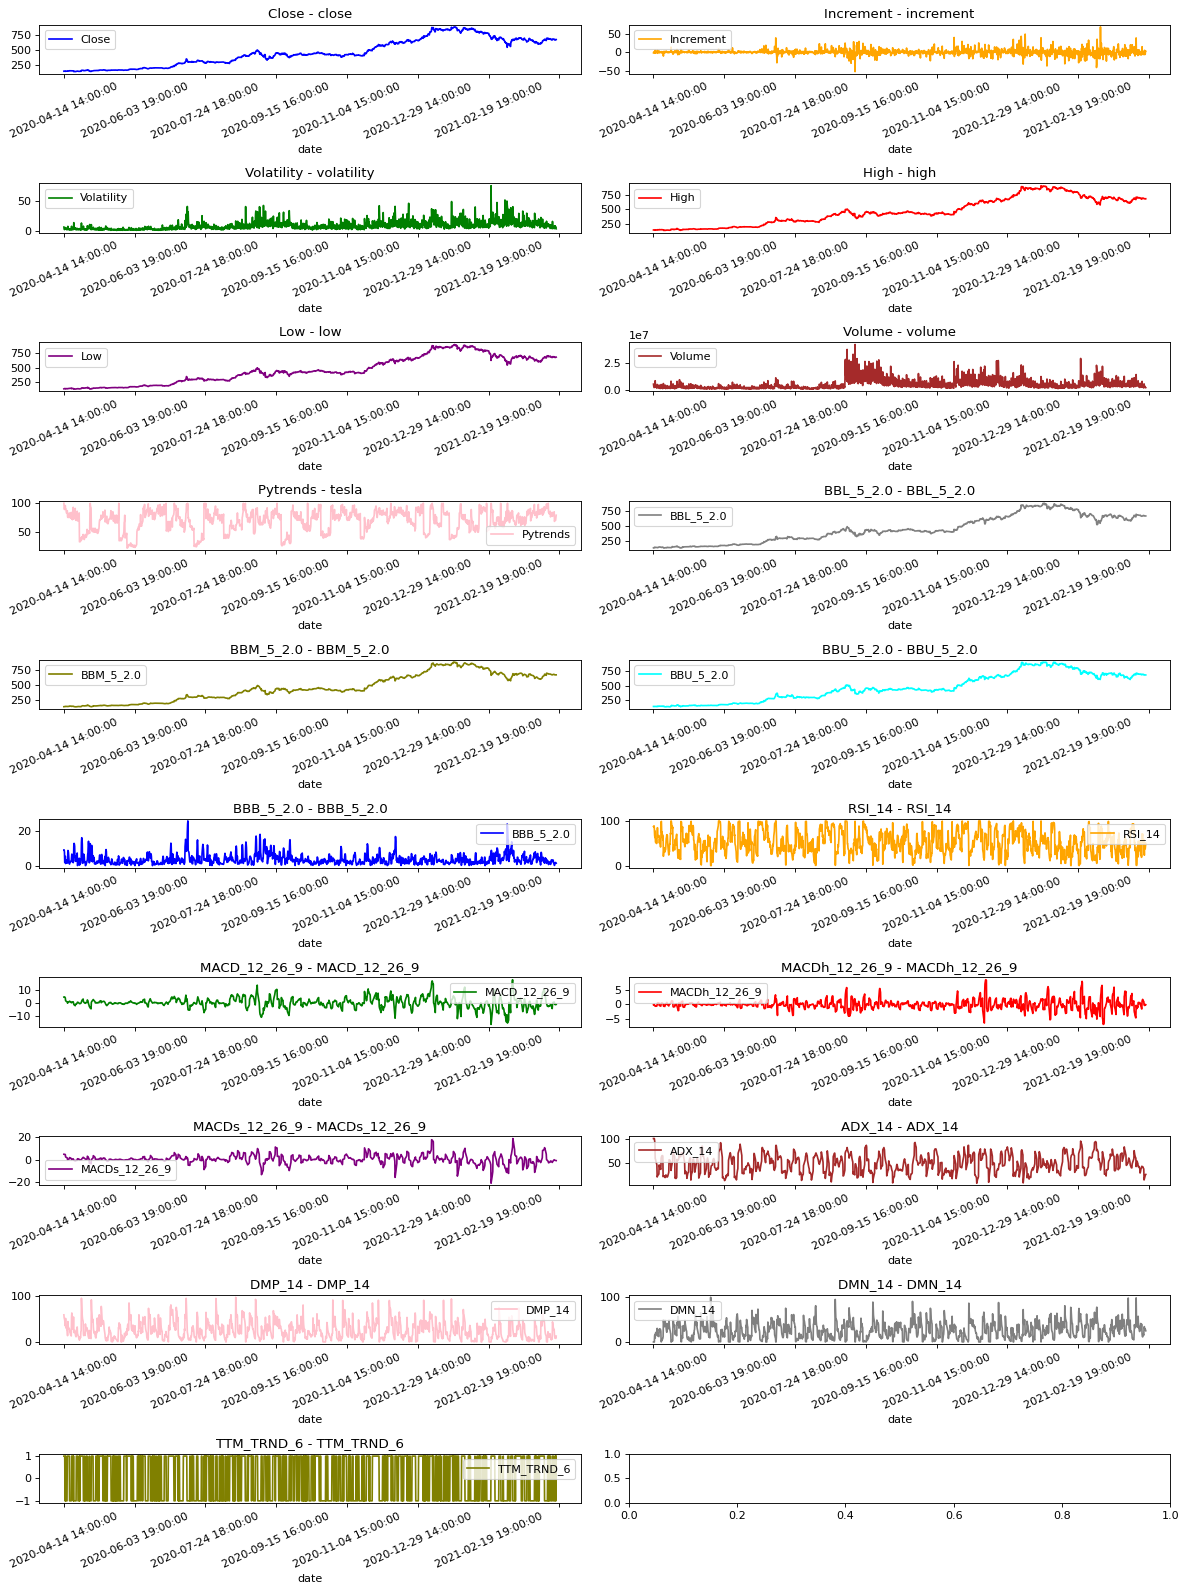

In [7]:
date_time_key = "date"
def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=10, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df_ann)

In [9]:
split_fraction = 0.8
train_split = int(split_fraction * int(df_ann.shape[0]))
step = 1 # How much time passes between data. We have data every hour so 1

past = 5*6 # Number of days * 6 hours (Time that the market is open - 1 hour)=> Use data from 30 previous hours
future = 1 #Do the prediction 1 hour after the actual hour
learning_rate = 0.00001 #Learning rate
batch_size = 256 #256
epochs = 80000 #800

In [10]:
import numpy as np
selec=np.array([1,2,5,6,7,8,9])
print(selec+1)

[ 2  3  6  7  8  9 10]


In [11]:
print(final_dataset.shape)
final_no_date=final_dataset[:,selec+1]
print(final_no_date)

(1740, 20)
[[-1.61199951171875 6.14715576171875 5196940.0 ... 135.6467572142827
  142.1211944580078 148.5956317017329]
 [1.003997802734375 2.5900115966796875 3000937.0 ... 136.77678064050002
  143.32439575195312 149.87201086340622]
 [0.665008544921875 1.7979888916015625 1928547.0 ... 139.05643424759262
  144.6605987548828 150.264763262173]
 ...
 [-6.00653076171875 6.9766845703125 2225426.0 ... 668.9493952027722
  675.1436767578125 681.3379583128528]
 [2.10150146484375 4.04351806640625 1998148.0 ... 668.82926125487
  674.5638671875 680.2984731201302]
 [2.6700439453125 3.10186767578125 1859831.0 ... 670.9173654637592
  675.6846923828125 680.4520193018658]]


## Scale data

In [12]:
from sklearn.preprocessing import MinMaxScaler

print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in selec]),
)
selected_features = [feature_keys[i] for i in selec]
features = df_ann[selected_features]
features.index = df_ann[date_time_key]
print(features.index)
features_=features.values

scaler = MinMaxScaler(feature_range=(0, 1))

features_ = pd.DataFrame(features_[:,:])

features_[features_.columns] = scaler.fit_transform(features_[features_.columns])

print(features_.shape)
print(features.head())

features_scaled_w_date=pd.DataFrame(features_)

features_scaled_w_date.insert(0,"date",features.index)

train_data = features_.loc[0 : train_split - 1]

val_data = features_.loc[train_split:]

The selected parameters are: Increment, Volatility, Volume, Pytrends, BBL_5_2.0, BBM_5_2.0, BBU_5_2.0
Index(['2020-04-14 14:00:00', '2020-04-14 15:00:00', '2020-04-14 16:00:00',
       '2020-04-14 17:00:00', '2020-04-14 18:00:00', '2020-04-14 19:00:00',
       '2020-04-15 13:00:00', '2020-04-15 14:00:00', '2020-04-15 15:00:00',
       '2020-04-15 16:00:00',
       ...
       '2021-04-08 17:00:00', '2021-04-08 18:00:00', '2021-04-08 19:00:00',
       '2021-04-09 13:00:00', '2021-04-09 14:00:00', '2021-04-09 15:00:00',
       '2021-04-09 16:00:00', '2021-04-09 17:00:00', '2021-04-09 18:00:00',
       '2021-04-09 19:00:00'],
      dtype='object', name='date', length=1740)
(1740, 7)
                    increment volatility  ...   BBM_5_2.0   BBU_5_2.0
date                                      ...                        
2020-04-14 14:00:00    -1.612    6.14716  ...  142.121194  148.595632
2020-04-14 15:00:00     1.004    2.59001  ...  143.324396  149.872011
2020-04-14 16:00:00  0.665009   

In [13]:
selec.size

7

In [14]:
start = past + future
end = start + train_split
#print([i+1 for i in range(selec.size)])
x_train = train_data[[i for i in range(selec.size)]].values
#print(x_train)
print(features.head())
print(features_.head())
y_train = features_.iloc[start:end][0]
#print(y_train)
sequence_length = int(past / step)
#print(sequence_length)

                    increment volatility  ...   BBM_5_2.0   BBU_5_2.0
date                                      ...                        
2020-04-14 14:00:00    -1.612    6.14716  ...  142.121194  148.595632
2020-04-14 15:00:00     1.004    2.59001  ...  143.324396  149.872011
2020-04-14 16:00:00  0.665009    1.79799  ...  144.660599  150.264763
2020-04-14 17:00:00 -0.910004      2.276  ...  145.814801  147.185867
2020-04-14 18:00:00  -2.50601    4.17799  ...  145.142999  147.760990

[5 rows x 7 columns]
                  date         0         1  ...         4         5         6
0  2020-04-14 14:00:00  0.420872  0.075829  ...  0.002616  0.002882  0.008474
1  2020-04-14 15:00:00  0.442493  0.028250  ...  0.004123  0.004487  0.010164
2  2020-04-14 16:00:00  0.439691  0.017656  ...  0.007165  0.006270  0.010684
3  2020-04-14 17:00:00  0.426674  0.024050  ...  0.014354  0.007809  0.006608
4  2020-04-14 18:00:00  0.413483  0.049490  ...  0.011794  0.006913  0.007370

[5 rows x 8 columns

In [15]:
print(x_train.shape)
print(y_train.shape)

(1392, 7)
(1392,)


In [16]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [17]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(selec.size)]].values
print(x_val.shape)
y_val = features_.iloc[label_start:][[0]]
print(y_val.shape)
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)
print(dataset_val)
for batch in dataset_train.take(1):
    inputs, targets = batch

(317, 7)
(317, 1)
<BatchDataset shapes: ((None, None, 7), (None, 1)), types: (tf.float64, tf.float64)>


In [18]:
print(x_val.shape)

(317, 7)


## Build model

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Flatten

model = keras.Sequential()
model.add(layers.Input(shape=(inputs.shape[1], inputs.shape[2])))
model.add(layers.LSTM(50,return_sequences=True))
model.add(Flatten())
model.add(layers.Dense(1))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse",metrics=[
        tf.keras.metrics.MeanSquaredError(),
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 50)            11600     
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 1500)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1501      
Total params: 13,101
Trainable params: 13,101
Non-trainable params: 0
_________________________________________________________________


In [20]:
print(inputs.shape[1])

30


In [21]:
print(dataset_train)

<BatchDataset shapes: ((None, None, 7), (None,)), types: (tf.float64, tf.float64)>


## Train

In [22]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.0000002, patience=25)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/80000
6/6 [==============================] - 3s 193ms/step - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.0318 - val_mean_squared_error: 0.0318

Epoch 00001: val_loss improved from inf to 0.03178, saving model to model_checkpoint.h5
Epoch 2/80000
6/6 [==============================] - 0s 84ms/step - loss: 0.0586 - mean_squared_error: 0.0586 - val_loss: 0.0293 - val_mean_squared_error: 0.0293

Epoch 00002: val_loss improved from 0.03178 to 0.02927, saving model to model_checkpoint.h5
Epoch 3/80000
6/6 [==============================] - 1s 89ms/step - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.0269 - val_mean_squared_error: 0.0269

Epoch 00003: val_loss improved from 0.02927 to 0.02692, saving model to model_checkpoint.h5
Epoch 4/80000
6/6 [==============================] - 1s 88ms/step - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.0247 - val_mean_squared_error: 0.0247

Epoch 00004: val_loss improved from 0.02692 to 0.02473, saving model to mod

## Visualize loss


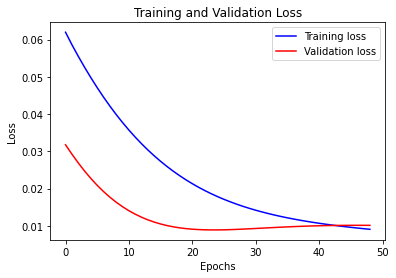

In [23]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

Checking variables

In [24]:
print(dataset_val.take(1))

<TakeDataset shapes: ((None, None, 7), (None, 1)), types: (tf.float64, tf.float64)>


In [25]:
dataset_val

<BatchDataset shapes: ((None, None, 7), (None, 1)), types: (tf.float64, tf.float64)>

In [26]:
time_data = df_ann[date_time_key]
print(time_data)

0       2020-04-14 14:00:00
1       2020-04-14 15:00:00
2       2020-04-14 16:00:00
3       2020-04-14 17:00:00
4       2020-04-14 18:00:00
               ...         
1735    2021-04-09 15:00:00
1736    2021-04-09 16:00:00
1737    2021-04-09 17:00:00
1738    2021-04-09 18:00:00
1739    2021-04-09 19:00:00
Name: date, Length: 1740, dtype: object


In [27]:
print(train_split+sequence_length)
print(label_start)

1422
1423


In [28]:
print(train_split)

1392


(288,)
date
2021-02-09 20:00:00    849.250000
2021-02-10 14:00:00    817.729980
2021-02-10 15:00:00    813.619995
2021-02-10 16:00:00    813.900024
2021-02-10 17:00:00    810.314514
                          ...    
2021-04-09 15:00:00    676.549988
2021-04-09 16:00:00    678.255005
2021-04-09 17:00:00    672.248474
2021-04-09 18:00:00    674.349976
2021-04-09 19:00:00    677.020020
Name: close, Length: 288, dtype: float64


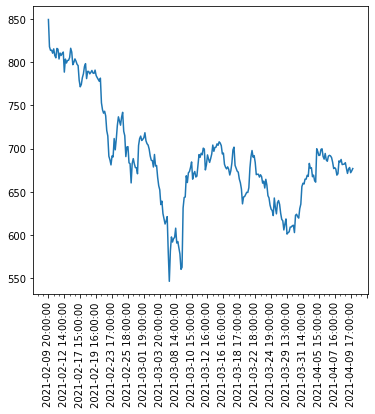

In [29]:
import matplotlib.ticker as ticker
dates_for_plot=time_data[label_start+sequence_length-1:]
print(dates_for_plot.shape)
t_data=df_ann["close"]
t_data_in=df_ann["increment"]
print(t_data[label_start+sequence_length-1:])
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=90,fontsize=10)
plt.subplots_adjust(top=51,bottom = 50)
plt.plot(t_data[label_start+sequence_length-1:])

In [30]:
y_hat=[]
y_hat_un=[]
for x, y in dataset_val:
    x_num=x.numpy()
    #print(x_num)
    x_num_shape=x_num.shape
    print(x_num_shape)
    #print(x[x_num_shape[0]-1,:,:])
    for j in range(x_num_shape[0]):
      x_ten=x[j,:,:]
      #print(x_ten)
      x_ten_re=tf.reshape(x_ten, [1,past,selec.size], name=None)
      #print(x_ten_re)
      #print(model.predict(x_ten_re))
      y_=model.predict(x_ten_re)
      y_hat.append(y_)
      x_un=scaler.inverse_transform(pd.DataFrame(x_ten))
      y_scaled=np.zeros([selec.size,selec.size])
      y_scaled[0]=y_
      #print(y_scaled)
      y_un=scaler.inverse_transform(pd.DataFrame(y_scaled))[0,0]
      #print(y_un)
      y_hat_un.append(y_un)
      #print(x_un)
      #print(y_un)
      #input("Press Enter to continue...")
    #print(model.predict(x_ten))
    #print(y)

#x_ten=x[x_num_shape[0]-1,:,:]
#x_ten_re=tf.reshape(x_ten, [1,30,15], name=None)
#print(x_ten_re)
#x_num=x.numpy()
#x_num_shape=x_num.shape
#print(model.predict(x_ten_re))
#print(y[x_num_shape[0]-1])

(256, 30, 7)
(32, 30, 7)


In [31]:
print(y_hat)

[array([[0.48084694]], dtype=float32), array([[0.48947126]], dtype=float32), array([[0.50392616]], dtype=float32), array([[0.51017755]], dtype=float32), array([[0.5253024]], dtype=float32), array([[0.53780943]], dtype=float32), array([[0.535594]], dtype=float32), array([[0.53158987]], dtype=float32), array([[0.52777386]], dtype=float32), array([[0.5241578]], dtype=float32), array([[0.51445574]], dtype=float32), array([[0.50283027]], dtype=float32), array([[0.5073636]], dtype=float32), array([[0.501081]], dtype=float32), array([[0.49371907]], dtype=float32), array([[0.48066622]], dtype=float32), array([[0.4776039]], dtype=float32), array([[0.4771393]], dtype=float32), array([[0.4726655]], dtype=float32), array([[0.47491404]], dtype=float32), array([[0.46446493]], dtype=float32), array([[0.46622723]], dtype=float32), array([[0.4621187]], dtype=float32), array([[0.45736867]], dtype=float32), array([[0.45518678]], dtype=float32), array([[0.45408785]], dtype=float32), array([[0.45709035]], 

In [32]:
print(len(y_hat))

288


date
2021-02-09 20:00:00    1.07972
2021-02-10 14:00:00    38.2082
2021-02-10 15:00:00    12.5472
2021-02-10 16:00:00    8.91357
2021-02-10 17:00:00    14.6092
                        ...   
2021-04-09 15:00:00    3.71266
2021-04-09 16:00:00    6.81009
2021-04-09 17:00:00    14.7721
2021-04-09 18:00:00    6.89505
2021-04-09 19:00:00    7.00382
Name: increment, Length: 288, dtype: object


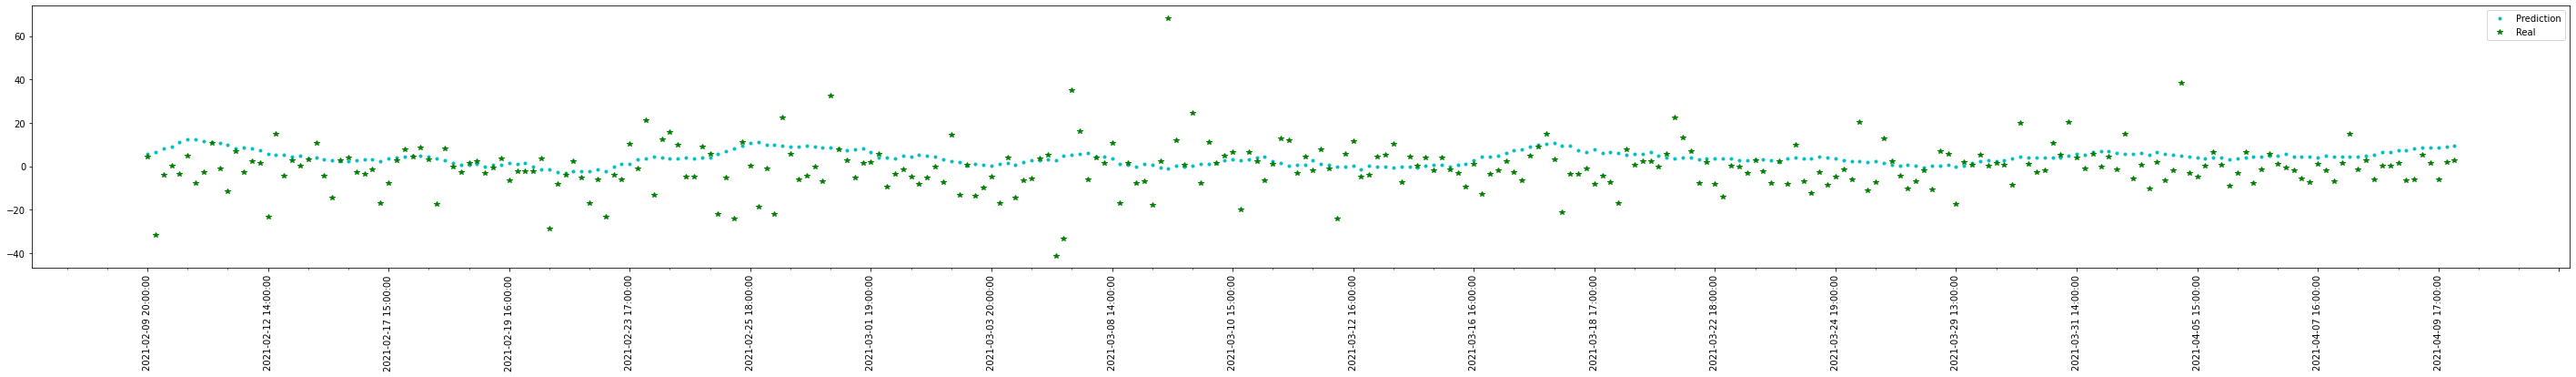

In [39]:
#Image_FORECASTING_INCREMENTAL_0
import numpy as np
y_hat_un_np=np.array(y_hat_un)
f = plt.figure()
f.set_figwidth(50)
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=90,fontsize=10)
plt.subplots_adjust(top=51,bottom = 50)
plt.plot(dates_for_plot,y_hat_un_np[:],'c.',label="Prediction")
plt.plot(dates_for_plot,t_data_in[label_start+sequence_length-1:],'g*',label="Real")
variation=y_hat_un_np[:]-t_data_in[label_start+sequence_length-1:]
plt.legend()

print(variation)
#print(y_hat_un_np)

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
rmse = sqrt(mean_squared_error(t_data_in[label_start+sequence_length-1:], y_hat_un_np))
print('Test RMSE: %.3f' % rmse)
# Calculate MAE
mae = mean_absolute_error(t_data_in[label_start+sequence_length-1:], y_hat_un_np)
print('Test MAE: %.3f' % mae)
# r2
from sklearn.metrics import r2_score
test_r2 = r2_score(t_data_in[label_start+sequence_length-1:], y_hat_un_np)
print('Test r2: %.3f' % test_r2)

Test RMSE: 12.067
Test MAE: 8.838
Test r2: -0.242


## Aplication

2021-03-22 16:00:00
-7.669799804687499


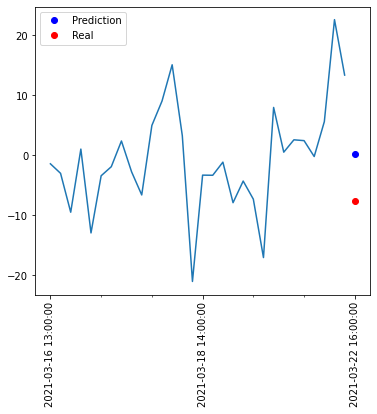

In [37]:
from datetime import datetime
dt = datetime.strptime('2021-03-22 16:00:00', '%Y-%m-%d %H:%M:%S')
mask = (features_scaled_w_date['date'] <= str(dt))
#print(features_scaled_w_date.shape)
features_scaled_w_date_tensor=features_scaled_w_date.loc[mask]
#print(features_scaled_w_date_tensor.shape)
dates_plot=features_scaled_w_date_tensor.iloc[-sequence_length-future-1:,:]
features_scaled_w_date_tensor=features_scaled_w_date_tensor.iloc[-sequence_length-future-1:-future-1,:]
#print(features_scaled_w_date_tensor.head())
tensor_single=tf.convert_to_tensor(features_scaled_w_date_tensor.iloc[:,1:])
#print(tensor_single)
x_ten_re_s=tf.reshape(tensor_single, [1,past,selec.size], name=None)


y_s=model.predict(x_ten_re_s)
x_un_s=scaler.inverse_transform(features_scaled_w_date_tensor.iloc[:,1:])
y_target=scaler.inverse_transform(dates_plot.iloc[:,1:])[sequence_length+future,0]

y_scaled_single=np.zeros([selec.size,selec.size])
y_scaled_single[0]=y_s
y_un_single=scaler.inverse_transform(pd.DataFrame(y_scaled_single))[0,0]
#print(x_un_s)
#print(y_un_single)

x_for_plot=x_un_s[:,0]
#print(dates_plot.head())
dates_1=dates_plot['date']
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=90,fontsize=10)
plt.subplots_adjust(top=51,bottom = 50)
plt.plot(dates_1[0:sequence_length],x_for_plot)
print(dates_1.iloc[sequence_length+future])
plt.plot(dates_1.iloc[sequence_length+future],y_un_single,'bo',label="Prediction")
print(y_target)
plt.plot(dates_1.iloc[sequence_length+future],y_target,'ro',label="Real")
plt.legend()